In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline

C:\Users\skigu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=15, random_state=42, n_informative=10)

In [3]:
X

array([[ 4.0797138 , -0.89209434, -0.02821722, ..., -0.39137814,
         0.4890754 , -0.59742726],
       [ 0.44285043, -0.51874556,  0.80277845, ...,  1.7444631 ,
        -0.83715142, -1.45443386],
       [ 4.61043707, -4.48986546,  0.65901812, ..., -0.734377  ,
        -2.08374417,  0.48071853],
       ...,
       [-2.78517166, -1.94147824,  0.01024378, ...,  0.1825556 ,
        -2.78137215, -0.72416302],
       [-0.47281612, -2.77943144,  0.61842305, ..., -3.14892135,
         0.38075011, -0.72574773],
       [ 0.51439155,  1.3306077 ,  0.64993373, ..., -0.06502428,
        -0.39712523,  0.5140747 ]])

In [4]:
y

array([14, 11, 11,  5,  7,  4,  7, 13,  0,  5, 13,  8,  5,  8, 10,  7,  2,
        5,  6,  8,  7, 11,  6,  0,  1,  7,  3, 10,  6,  3,  8,  5, 12,  8,
        4,  8,  0, 10, 12, 11, 10, 14, 12,  0,  1, 10,  0,  8, 11, 10, 12,
       13,  3,  5,  1,  7,  5,  2,  7, 13,  8,  2,  0, 12, 12,  9, 13,  4,
       13,  6, 13, 14,  8,  5,  9, 11,  7, 13,  1, 13,  3, 10,  1,  6, 10,
        8, 12,  1,  4,  0,  6,  4,  3,  1, 13,  6, 13,  1, 13,  0,  3,  3,
       12, 11,  6, 11,  2,  8,  3, 12,  2, 10,  3,  6,  4,  8,  7, 13,  8,
        1,  1,  1,  8, 13,  9, 11, 14,  6,  5, 12, 10,  3,  3, 13,  3,  0,
        9,  9,  2,  3, 10,  7, 12,  0, 12,  6,  8,  4, 11, 14,  1,  3, 11,
        0,  3,  7,  6,  3,  4, 10, 13,  2,  2, 11,  0, 11,  3, 11, 12,  6,
        4,  6,  7,  5,  5,  6, 13,  3, 11,  3,  6,  3, 10,  7,  1, 14,  0,
        6,  6,  2,  4,  1, 12,  7,  7,  9, 12, 14,  2,  1,  9, 10,  7, 13,
       14,  6, 13,  9,  7,  5,  3,  1,  3,  4, 14,  1,  5,  1,  9, 14,  9,
        7,  4, 14,  2, 14

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
classifier = OneVsRestClassifier(knn)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [7]:
y_score

array([[0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.33333333, 0.        ,
        0.33333333]])

In [8]:
y_test_bin = label_binarize(y_test, classes=list(range(15)))

In [9]:
y_test_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [10]:
fpr = dict()
tpr = dict()
roc_auc = dict()


In [11]:
for i in range(15):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

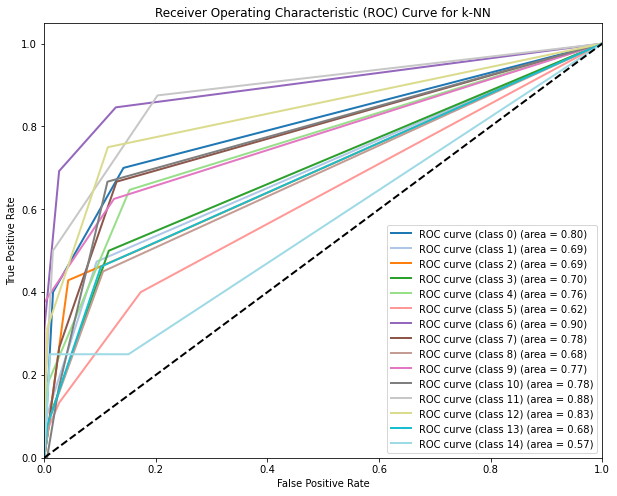

In [12]:
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab20', 15)

for i in range(15):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for k-NN')
plt.legend(loc="lower right")
plt.show()